<a href="https://colab.research.google.com/github/XiaochuanAi/sample.github.io/blob/main/%E2%80%9CCycleGAN%E2%80%9D%E7%9A%84Test_10%2C10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.7 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [4]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

Specified [horse2zebra]
for details.

--2025-05-07 21:51:24--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘./datasets/horse2zebra.zip’

./datasets/horse2ze 100%[===================>] 111.45M  2.13MB/s    in 55s     

2025-05-07 21:52:18 (2.04 MB/s) - ‘./datasets/horse2zebra.zip’ saved [116867962/116867962]

Archive:  ./datasets/horse2zebra.zip
   creating: ./datasets/horse2zebra/trainA/
  inflating: ./datasets/horse2zebra/trainA/n02381460_6223.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_1567.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_3354.jpg  
  inflating: ./datasets/horse2zebra/trainA/n02381460_299.jpg  
  inflating: ./datasets/horse2zebra/t

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2025-05-07 19:20:39--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  12.7MB/s    in 3.8s    

2025-05-07 19:20:43 (11.6 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [20]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --display_id -1 --n_epochs 10 --n_epochs_decay 10 --load_size 128 --crop_size 128

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 128                           	[default: 256]
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest           

In [15]:
!ls ./checkpoints/horse2zebra/


10_net_D_A.pth	5_net_D_A.pth  latest_net_D_A.pth  loss_log.txt
10_net_D_B.pth	5_net_D_B.pth  latest_net_D_B.pth  test_opt.txt
10_net_G_A.pth	5_net_G_A.pth  latest_net_G_A.pth  train_opt.txt
10_net_G_B.pth	5_net_G_B.pth  latest_net_G_B.pth  web


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --display_id -1 --n_epochs 10 --n_epochs_decay 5  --load_size 128 --crop_size 128
# V2

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [58]:
!ls ./checkpoints/horse2zebra/

10_net_D_A.pth	15_net_G_B.pth	5_net_G_A.pth	    loss_log.txt
10_net_D_B.pth	20_net_D_A.pth	5_net_G_B.pth	    test_opt.txt
10_net_G_A.pth	20_net_D_B.pth	latest_net_D_A.pth  train_opt.txt
10_net_G_B.pth	20_net_G_A.pth	latest_net_D_B.pth  web
15_net_D_A.pth	20_net_G_B.pth	latest_net_G_A.pth
15_net_D_B.pth	5_net_D_A.pth	latest_net_G_B.pth
15_net_G_A.pth	5_net_D_B.pth	latest_net_G.pth


In [60]:
# !python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout
# !python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra --model test --no_dropout
# !python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra --model test --no_dropout  --model_suffix _A
# !cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra --model test --no_dropout --num_test 140 --model_suffix _A


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

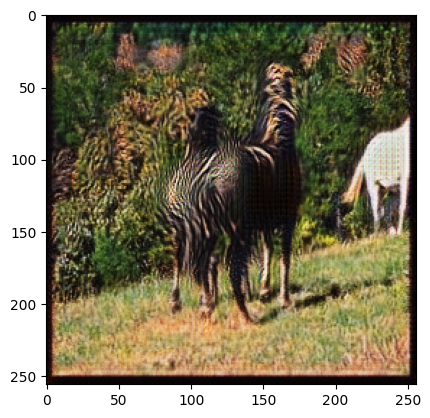

In [64]:
import matplotlib.pyplot as plt

# img = plt.imread('./results/horse2zebra/test_latest/images/n02381460_1010_fake.png')
img = plt.imread('./results/horse2zebra/test_latest/images/n02381460_1000_fake.png')
plt.imshow(img)

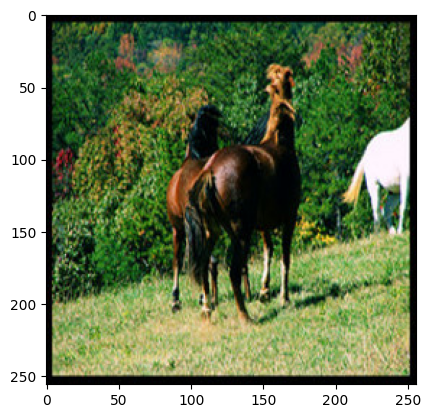

In [65]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra/test_latest/images/n02381460_1000_real.png')
plt.imshow(img)

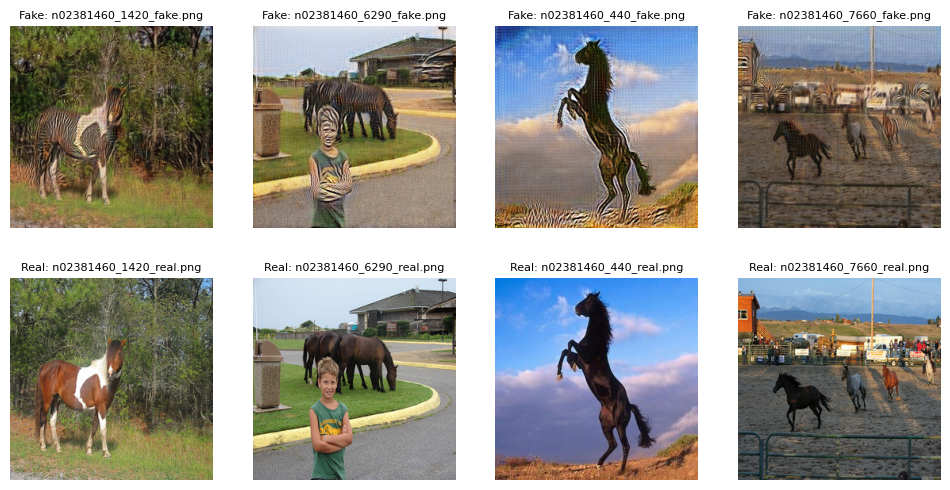

In [71]:
import matplotlib.pyplot as plt
import os
import random
random.seed(9)
# 修改这里

# Define the directory containing the images
image_dir = './results/horse2zebra/test_latest/images/'

# Get all fake image filenames
all_fake_images = [f for f in os.listdir(image_dir) if f.endswith('_fake.png')]

# Randomly select 8 fake images
selected_fake_images = random.sample(all_fake_images, 8)

# Set up the figure with 2 rows of 2x4 subplots (one row for fake, one for real)
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# First row: fake/generated images
for i, ax in enumerate(axes[0]):
    fake_path = os.path.join(image_dir, selected_fake_images[i])
    img = plt.imread(fake_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Fake: {selected_fake_images[i]}', fontsize=8)

# Second row: corresponding real/original images
for i, ax in enumerate(axes[1]):
    real_filename = selected_fake_images[i].replace('_fake.png', '_real.png')
    real_path = os.path.join(image_dir, real_filename)
    if os.path.exists(real_path):
        img = plt.imread(real_path)
        ax.imshow(img)
    else:
        ax.text(0.5, 0.5, 'Missing', ha='center', va='center')
    ax.axis('off')
    ax.set_title(f'Real: {real_filename}', fontsize=8)

plt.tight_layout

plt.savefig('/kaggle/output_plot_6.png', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
!pip install pytorch-fid
import os
import shutil


# Paths
generated_dir = './results/horse2zebra/test_latest/images/'
real_dir = './datasets/horse2zebra/testB/'

# Temporary folders for FID computation
fid_fake_dir = './fid_temp/fake'
fid_real_dir = './fid_temp/real'

# Ensure clean folders
for path in [fid_fake_dir, fid_real_dir]:
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

# Copy fake images
for file in os.listdir(generated_dir):
    # if file.endswith('_fake.png'):
    if file.endswith('_fake_B.png') or file.endswith('_fake.png'):
        shutil.copy(os.path.join(generated_dir, file), os.path.join(fid_fake_dir, file))

# Copy real images
for file in os.listdir(real_dir):
    if file.endswith('.jpg') or file.endswith('.png'):
        shutil.copy(os.path.join(real_dir, file), os.path.join(fid_real_dir, file))

import subprocess

result = subprocess.run(
    ['python', '-m', 'pytorch_fid', fid_real_dir, fid_fake_dir],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)
print("Real images:", len(os.listdir(fid_real_dir)))
print("Fake images:", len(os.listdir(fid_fake_dir)))

# Print the actual FID score
print(result.stdout)

Real images: 140
Fake images: 120
FID:  143.13739500754792



In [73]:
#revise
from PIL import Image
import os
import shutil
import subprocess

generated_dir = './results/horse2zebra/test_latest/images/'
real_dir = './datasets/horse2zebra/testB/'
fid_fake_dir = './fid_temp/fake'
fid_real_dir = './fid_temp/real'

for path in [fid_fake_dir, fid_real_dir]:
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)

# Copy fake
for file in os.listdir(generated_dir):
    if file.endswith('_fake_B.png') or file.endswith('_fake.png'):
        shutil.copy(os.path.join(generated_dir, file), os.path.join(fid_fake_dir, file))

# Copy real
for file in os.listdir(real_dir):
    if file.endswith('.jpg') or file.endswith('.png'):
        shutil.copy(os.path.join(real_dir, file), os.path.join(fid_real_dir, file))

# Resize to 256x256
def resize_folder(folder):
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        try:
            img = Image.open(path).convert('RGB').resize((256, 256))
            img.save(path)
        except:
            print(f"Skipped: {path}")

resize_folder(fid_real_dir)
resize_folder(fid_fake_dir)

# Run FID
result = subprocess.run(
    ['python', '-m', 'pytorch_fid', fid_real_dir, fid_fake_dir],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True
)
print("Real images:", len(os.listdir(fid_real_dir)))
print("Fake images:", len(os.listdir(fid_fake_dir)))
print("FID Result:\n", result.stdout)


Real images: 140
Fake images: 120
FID Result:
 FID:  136.19675631047178

